In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import math
import scipy
from sklearn.datasets import samples_generator as gen

Entropy $$H(X)=-\sum_{i=1}^{n}P(x_i)log_2P(x_i)$$

Gini $$Gini(X)=1-\sum_{i=1}^{n}P(x_i)^2$$

Information Gain $$I(S, A)=H(S)-\sum_{k \in vals(A)}\frac{|S_k|}{|S|} H(S_k)$$

In [11]:
def entropy(X):
    hist, _ = np.histogram(X, bins=len(set(X))) 
    probs = hist / len(X)    
    return -sum(probs * np.log2(probs))

def gini(X):
    hist, _ = np.histogram(X, bins=len(set(X))) 
    probs = hist / len(X)    
    return 1 - sum(np.square(probs))

def gain(data, attribute, target=-1):
    h = entropy(data[:,target])
    vals = set(data[:,attribute])
    l = len(data)
    for val in vals:
        subset = data[data[:, attribute] is val]
        h -= len(subset) / l * entropy(subset[:,target])
    return h

In [10]:
def plt_dist(X, title=None, labels=None, figsize=(5, 3), range=(0, 6), color=None): 
    plt.hist(X, rwidth=0.7, bins=max(range) - min(range) , range=range, align='left', color=color)
    plt.title(title)
    plt.ylabel('N')
    plt.gca().set_xticklabels(labels)        

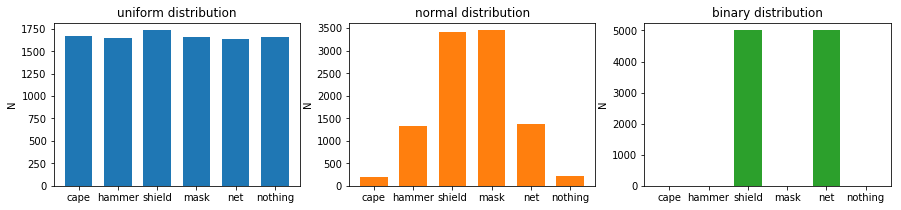

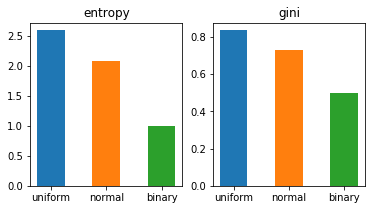

In [177]:
N = 10000

data = np.random.randint(0, 6, (N))
data2 = [int(x) for x in np.random.normal(loc=3, size=(N)) if 0 <= x <= 6]
data3 = [2] * (N // 2) + [4] * (N // 2)
labels = ['', 'cape', 'hammer', 'shield', 'mask', 'net', 'nothing']
   
plt.subplot(131); plt_dist(data, 'uniform distribution', labels, color='C0')
plt.subplot(132); plt_dist(data2, 'normal distribution', labels, color='C1')
plt.subplot(133); plt_dist(data3, 'binary distribution', labels, color='C2')
plt.gcf().set_size_inches(15, 3)
plt.show()

plt.subplot(121)
plt.bar(0, [entropy(data)], width=0.5, color='C0')
plt.bar(1, [entropy(data2)], width=0.5, color='C1')
plt.bar(2, [entropy(data3)], width=0.5, color='C2')
plt.gca().set_xticklabels(['', 'uniform', 'normal', 'binary'])
plt.title('entropy')

plt.subplot(122)
plt.bar(0, [gini(data)], width=0.5, color='C0')
plt.bar(1, [gini(data2)], width=0.5, color='C1')
plt.bar(2, [gini(data3)], width=0.5, color='C2')
plt.gca().set_xticklabels(['', 'uniform', 'normal', 'binary'])
plt.title('gini')

plt.gcf().set_size_inches(6, 3)
plt.show()
            

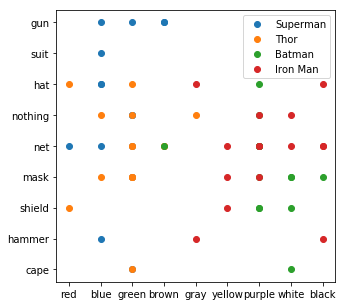

In [253]:
N = 60

xlabels = ['red', 'blue', 'green', 'brown', 'gray', 'yellow', 'purple', 'white', 'black']
ylabels = ['cape', 'hammer', 'shield', 'mask', 'net', 'nothing', 'hat', 'suit', 'gun']
clabels = ['Superman', 'Thor', 'Batman', 'Iron Man', 'Spiderman', 'Groot', 'Captain America', 'Hulk']
lx, ly, lc = len(xlabels), len(ylabels), len(clabels)

data = np.int32(np.concatenate((
    np.random.normal(loc=(lx / 4, ly / 2), scale=(1, 2), size=(N // 2, 2)),
    np.random.normal(loc=(lx / 4 * 3, ly / 2), scale=(1, 2), size=(N // 2, 2))
)))

data = np.clip(data, 0, (lx - 1, ly - 1))
data = np.c_[data, np.zeros(len(data))]

n = N // 4
for i in range(4):
    data[i*n:(i+1)*n, 2] = i

for i, c in enumerate(set(data[:,2])):
    sub = data[data[:,2] == c]
    plt.plot(sub[:,0], sub[:,1], 'C{}o'.format(i), label=clabels[i])

plt.xticks(range(len(xlabels)), xlabels)
plt.yticks(range(len(ylabels)), ylabels)
plt.legend()
plt.gcf().set_size_inches(5, 5)
plt.show()


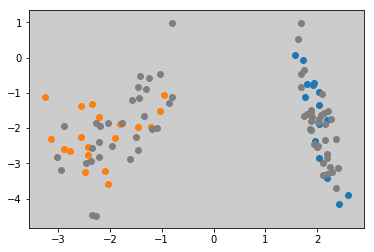

In [87]:
data, label = gen.make_classification(n_features=2, n_redundant=0, n_classes=2,
                                      n_clusters_per_class=1, class_sep=2)

label[:-len(label) // 3] = 7

for c in set(label):
    x, y = zip(*[x for x, y in zip(data, label) if y == c])
    plt.scatter(x, y, color='C{}'.format(c))
    
plt.gca().set_facecolor('0.8')
plt.show()
